<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Finalized_Traincsv(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train CSV**

Data Cleaning

Data cleaning Tasks : Handling missing values. Correcting data entry errors. Standardizing data formats. Encoding categorical variables. Removing duplicates or irrelevant data.

In [7]:
import pandas as pd
train = pd.read_csv('/content/traincsv.csv')

<ipython-input-7-49c58e9c1ac8>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/traincsv.csv')


In [8]:
#convert the strings to numeric value
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

Customer ID

In [9]:
missing_percentage = (train['Customer_ID'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.00%


In [10]:
# Remove rows with missing values in customerId
train = train.dropna()

Outlets

In [11]:
#Identifying unique Ids in train
train["outlet_city"].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

Luxury sales

In [12]:
# Convert numeric values stored as strings to float
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce')
train['luxury_sales'].dtype

<ipython-input-12-6ba52e06a190>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce')


dtype('float64')

In [13]:
train.isna().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_categeory,0


<Axes: xlabel='luxury_sales', ylabel='Count'>

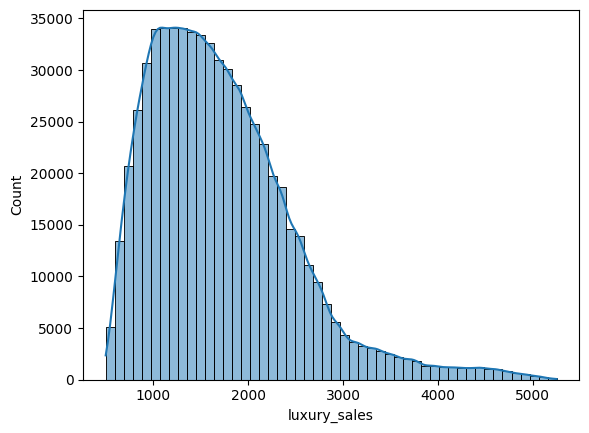

In [14]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['luxury_sales'], bins=50, kde=True)

Since its right skewwed using the median approah.

In [15]:
train['luxury_sales'].fillna(train['luxury_sales'].median(), inplace=True)

<ipython-input-15-722a16d15c84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['luxury_sales'].fillna(train['luxury_sales'].median(), inplace=True)


In [16]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_categeory,0


Fresh Sales

In [17]:
# Convert numeric values stored as strings to float
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce')
train['fresh_sales'].dtype

dtype('float64')

In [18]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_categeory,0


<Axes: xlabel='fresh_sales', ylabel='Count'>

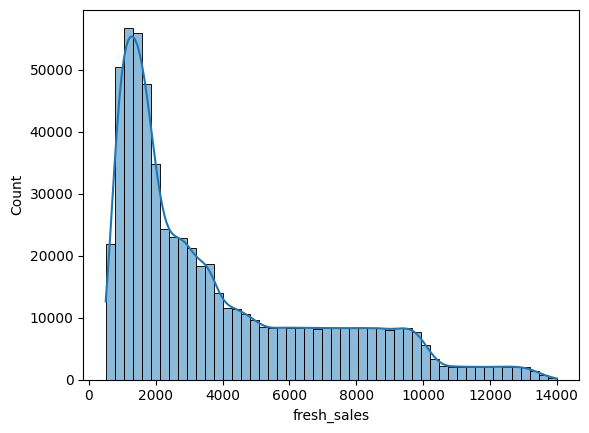

In [19]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['fresh_sales'], bins=50, kde=True)

In [20]:
train['fresh_sales'].fillna(train['fresh_sales'].median(), inplace=True)

<ipython-input-20-fce729a411ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['fresh_sales'].fillna(train['fresh_sales'].median(), inplace=True)


Dry Sales

In [21]:
# Convert numeric values stored as strings to float
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce') # Changed 'df' to 'train'
train['dry_sales'].dtype

dtype('float64')

<Axes: xlabel='dry_sales', ylabel='Count'>

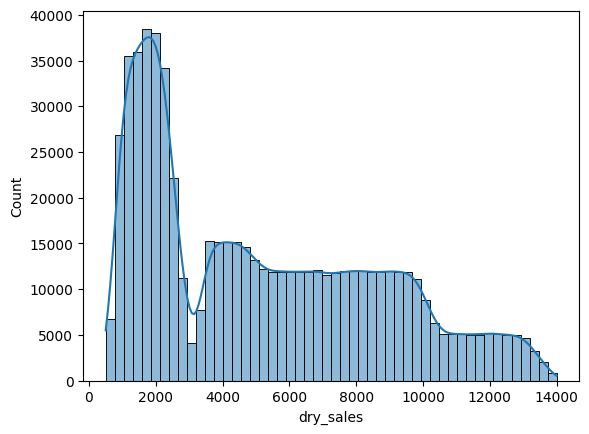

In [22]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['dry_sales'], bins=50, kde=True)

In [23]:
train['dry_sales'].fillna(train['dry_sales'].median(), inplace=True)

<ipython-input-23-b485c19bb8c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['dry_sales'].fillna(train['dry_sales'].median(), inplace=True)


cluster Analysis

In [26]:
# Convert numeric values stored as strings to float
train['cluster_catgeory'] = pd.to_numeric(train['cluster_categeory'], errors='coerce')
train['cluster_catgeory'].dtype

dtype('float64')

In [27]:
train.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,6.347680e+05,634768.000000,634768.000000,634768.000000,634767.000000
mean,1.038704e+07,1719.074961,3887.262977,5166.405421,2.929851
std,2.235567e+05,761.321188,3099.524327,3510.304897,1.771110
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000
25%,1.019326e+07,1149.830000,1449.700000,1956.472500,1.000000
50%,1.038714e+07,1597.500000,2688.335000,4471.200000,2.000000
75%,1.058070e+07,2128.740000,5815.942500,7956.960000,4.000000
max,1.077415e+07,5249.650000,13993.000000,13999.300000,100.000000


In [28]:
#Identifying outliers
valid_categories = [ 1, 2, 3, 4, 5, 6]
outliers = train[~train['cluster_catgeory'].isin(valid_categories)]
#Checking which outliers exist
print(outliers['cluster_catgeory'].unique())

[ 99.  nan  95.  98. 100.  89.]


In [29]:
train_cleaned = train[train['cluster_catgeory'].isin(valid_categories)]

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634768 entries, 0 to 634855
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_ID        634768 non-null  float64
 1   outlet_city        634768 non-null  object 
 2   luxury_sales       634768 non-null  float64
 3   fresh_sales        634768 non-null  float64
 4   dry_sales          634768 non-null  float64
 5   cluster_categeory  634768 non-null  object 
 6   cluster_catgeory   634767 non-null  float64
dtypes: float64(5), object(2)
memory usage: 38.7+ MB


In [31]:
print(train['cluster_catgeory'].isna().sum())  # Count missing values

1


In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['cluster_catgeory'] = encoder.fit_transform(train['cluster_catgeory'])
train['cluster_catgeory'].unique()

array([ 3,  0,  9,  1,  4,  2,  5, 11,  7,  8, 10,  6])

Feature engineeering (Label Encording)

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the outlet_city column
train['outlet_city'] = le.fit_transform(train['outlet_city'])

# Check encoding
print(train[['outlet_city']].head())

   outlet_city
0           11
1           13
2           19
3           19
4           11


In [34]:
train['outlet_city'].unique()

array([11, 13, 19,  5,  2, 16,  7, 17, 12, 15,  0,  1,  6,  4,  8,  3, 10,
       14, 18,  9])

In [35]:
train_cleaned.to_csv('/content/traincsv.csv', index=False)
print("CSV file has been saved!")

CSV file has been saved!


In [38]:
from google.colab import files
train.to_csv('cleaned_Train.csv', encoding = 'utf-8-sig')
files.download('cleaned_Train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EDA For Cleaned Train Dataset

In [39]:
import matplotlib.pyplot as plt
import plotly.express as px

In [40]:
#Sales by City
city_sales = train.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig1 = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig1.show()

Feature Scaling

Standardization  (z-score: mean=0, std=1)

In [41]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
X = ['luxury_sales', 'dry_sales', 'fresh_sales', 'outlet_city']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
train[X] = scaler.fit_transform(train[X])

# Preview the updated dataframe
print(train[X].head())

   luxury_sales  dry_sales  fresh_sales  outlet_city
0     -0.669199   0.035779    -1.010241     0.201650
1     -0.169383   0.239499    -0.912135     0.549407
2      0.748443   1.136402    -0.776321     1.592678
3      0.730133   1.120517    -0.692882     1.592678
4      0.822801   1.161605    -0.586449     0.201650
